In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.simplefilter("ignore")

In [7]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN23596,2,0,2,3,Meal Plan 1,0,Room_Type 1,188,2018,8,26,Online,0,0,0,90.95,0,Canceled
1,INN12127,1,0,1,4,Not Selected,0,Room_Type 1,20,2018,7,11,Online,0,0,0,139.00,0,Canceled
2,INN06852,2,0,0,4,Meal Plan 1,0,Room_Type 1,36,2017,10,21,Online,0,0,0,96.30,2,Not_Canceled
3,INN18232,2,0,0,1,Not Selected,0,Room_Type 1,77,2018,5,7,Online,0,0,0,116.10,1,Not_Canceled
4,INN35817,1,0,1,1,Meal Plan 1,0,Room_Type 1,32,2018,7,18,Offline,0,0,0,85.00,0,Not_Canceled


In [11]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.drop(columns=['Booking_ID'] , inplace=True)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [14]:
df.shape

(7255, 18)

In [15]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(1186)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(6069, 18)

In [19]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [21]:
df["repeated_guest"].value_counts()

repeated_guest
0    5882
1     187
Name: count, dtype: int64

In [20]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    4270
Canceled        1799
Name: count, dtype: int64

###### Our data is imbalanced

In [22]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [23]:
data = df.copy()

In [24]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,Meal Plan 1,0,Room_Type 1,188,2018,8,26,Online,0,0,0,90.95,0,Canceled
1,1,0,1,4,Not Selected,0,Room_Type 1,20,2018,7,11,Online,0,0,0,139.00,0,Canceled
2,2,0,0,4,Meal Plan 1,0,Room_Type 1,36,2017,10,21,Online,0,0,0,96.30,2,Not_Canceled
3,2,0,0,1,Not Selected,0,Room_Type 1,77,2018,5,7,Online,0,0,0,116.10,1,Not_Canceled
4,1,0,1,1,Meal Plan 1,0,Room_Type 1,32,2018,7,18,Offline,0,0,0,85.00,0,Not_Canceled


##### UNIVARIATE ANALYSIS

In [30]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

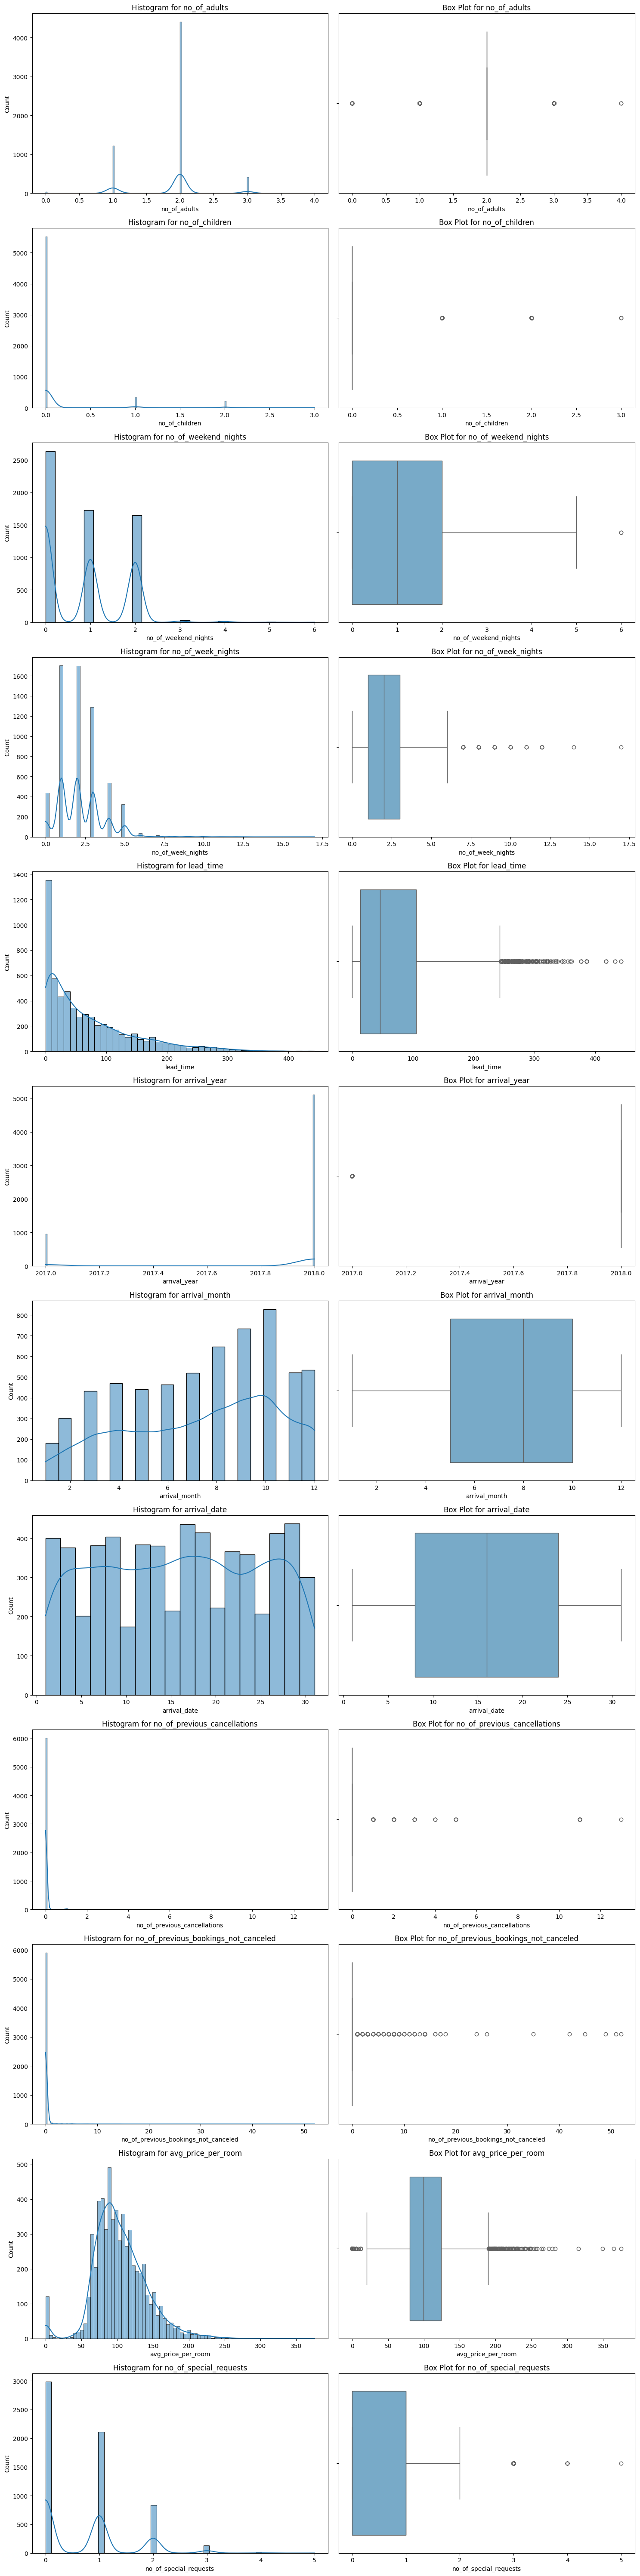

In [31]:
num_plot_dist(data , num_cols)

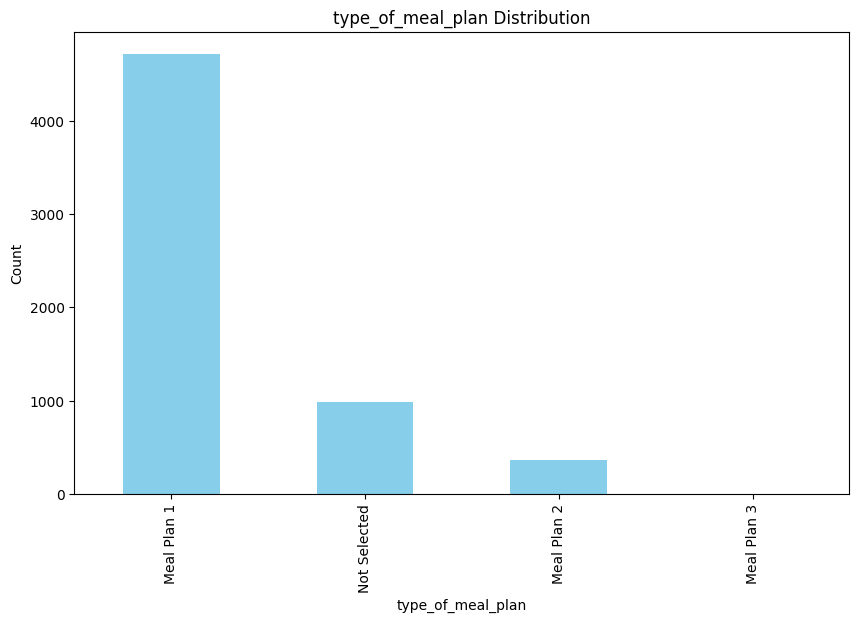

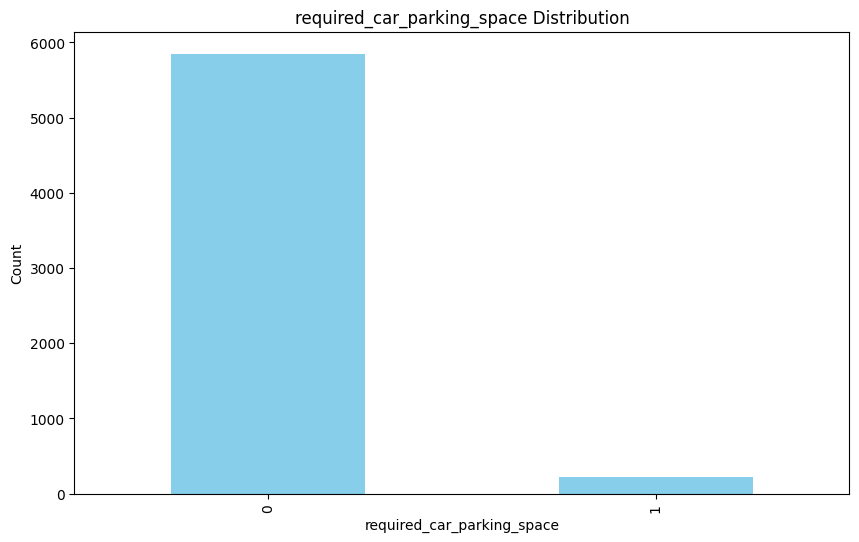

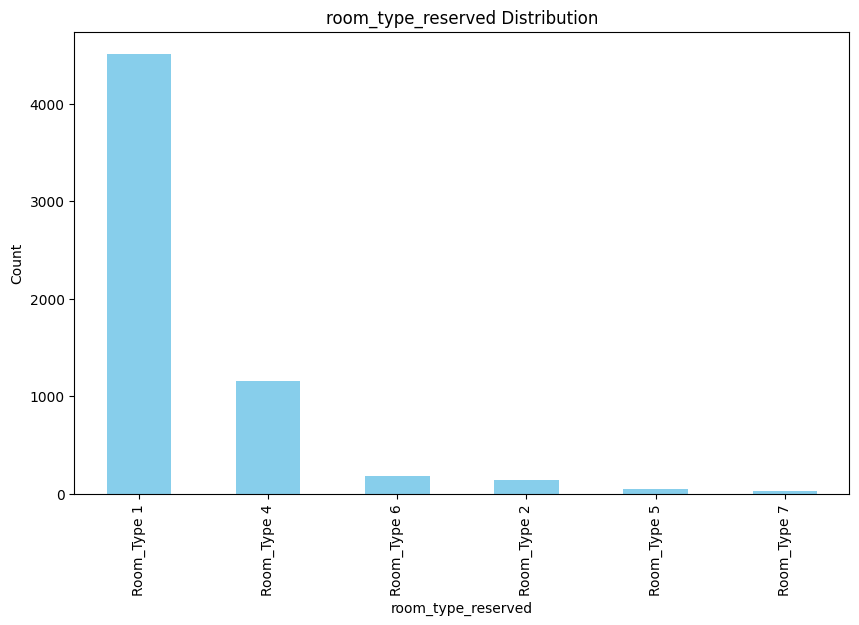

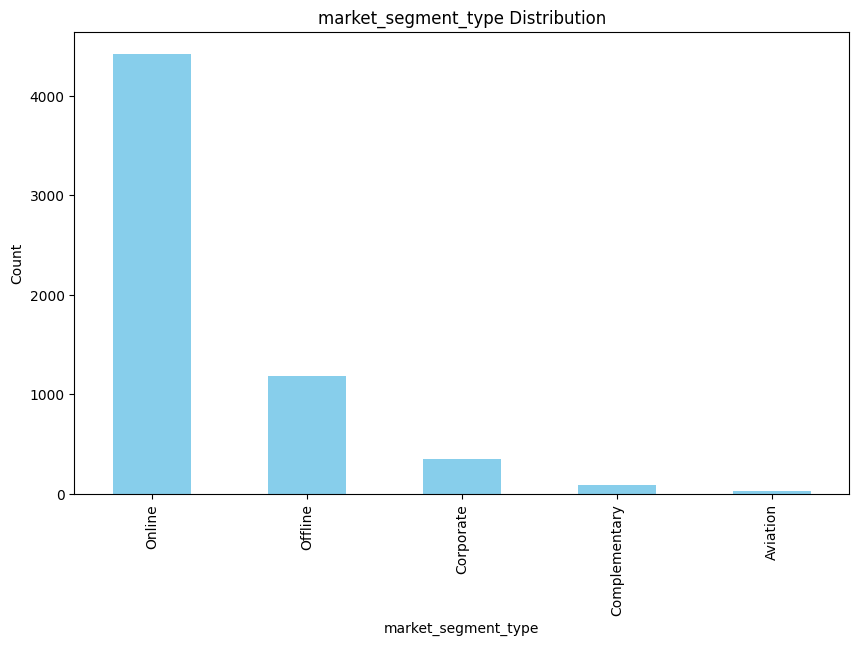

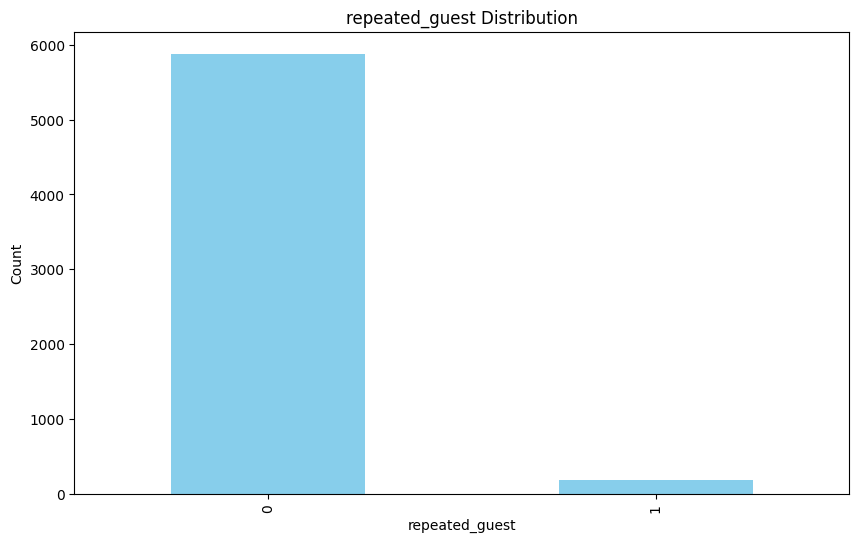

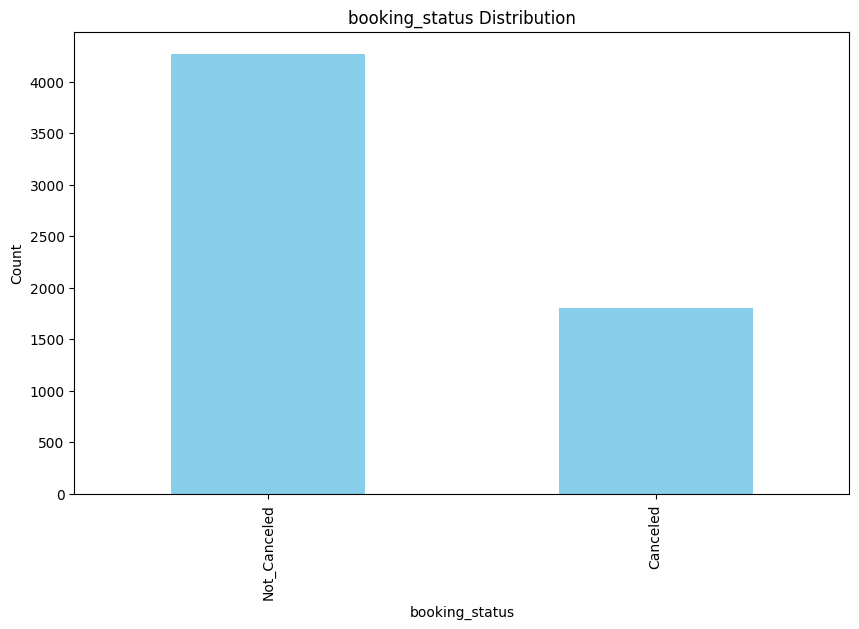

In [33]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [35]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

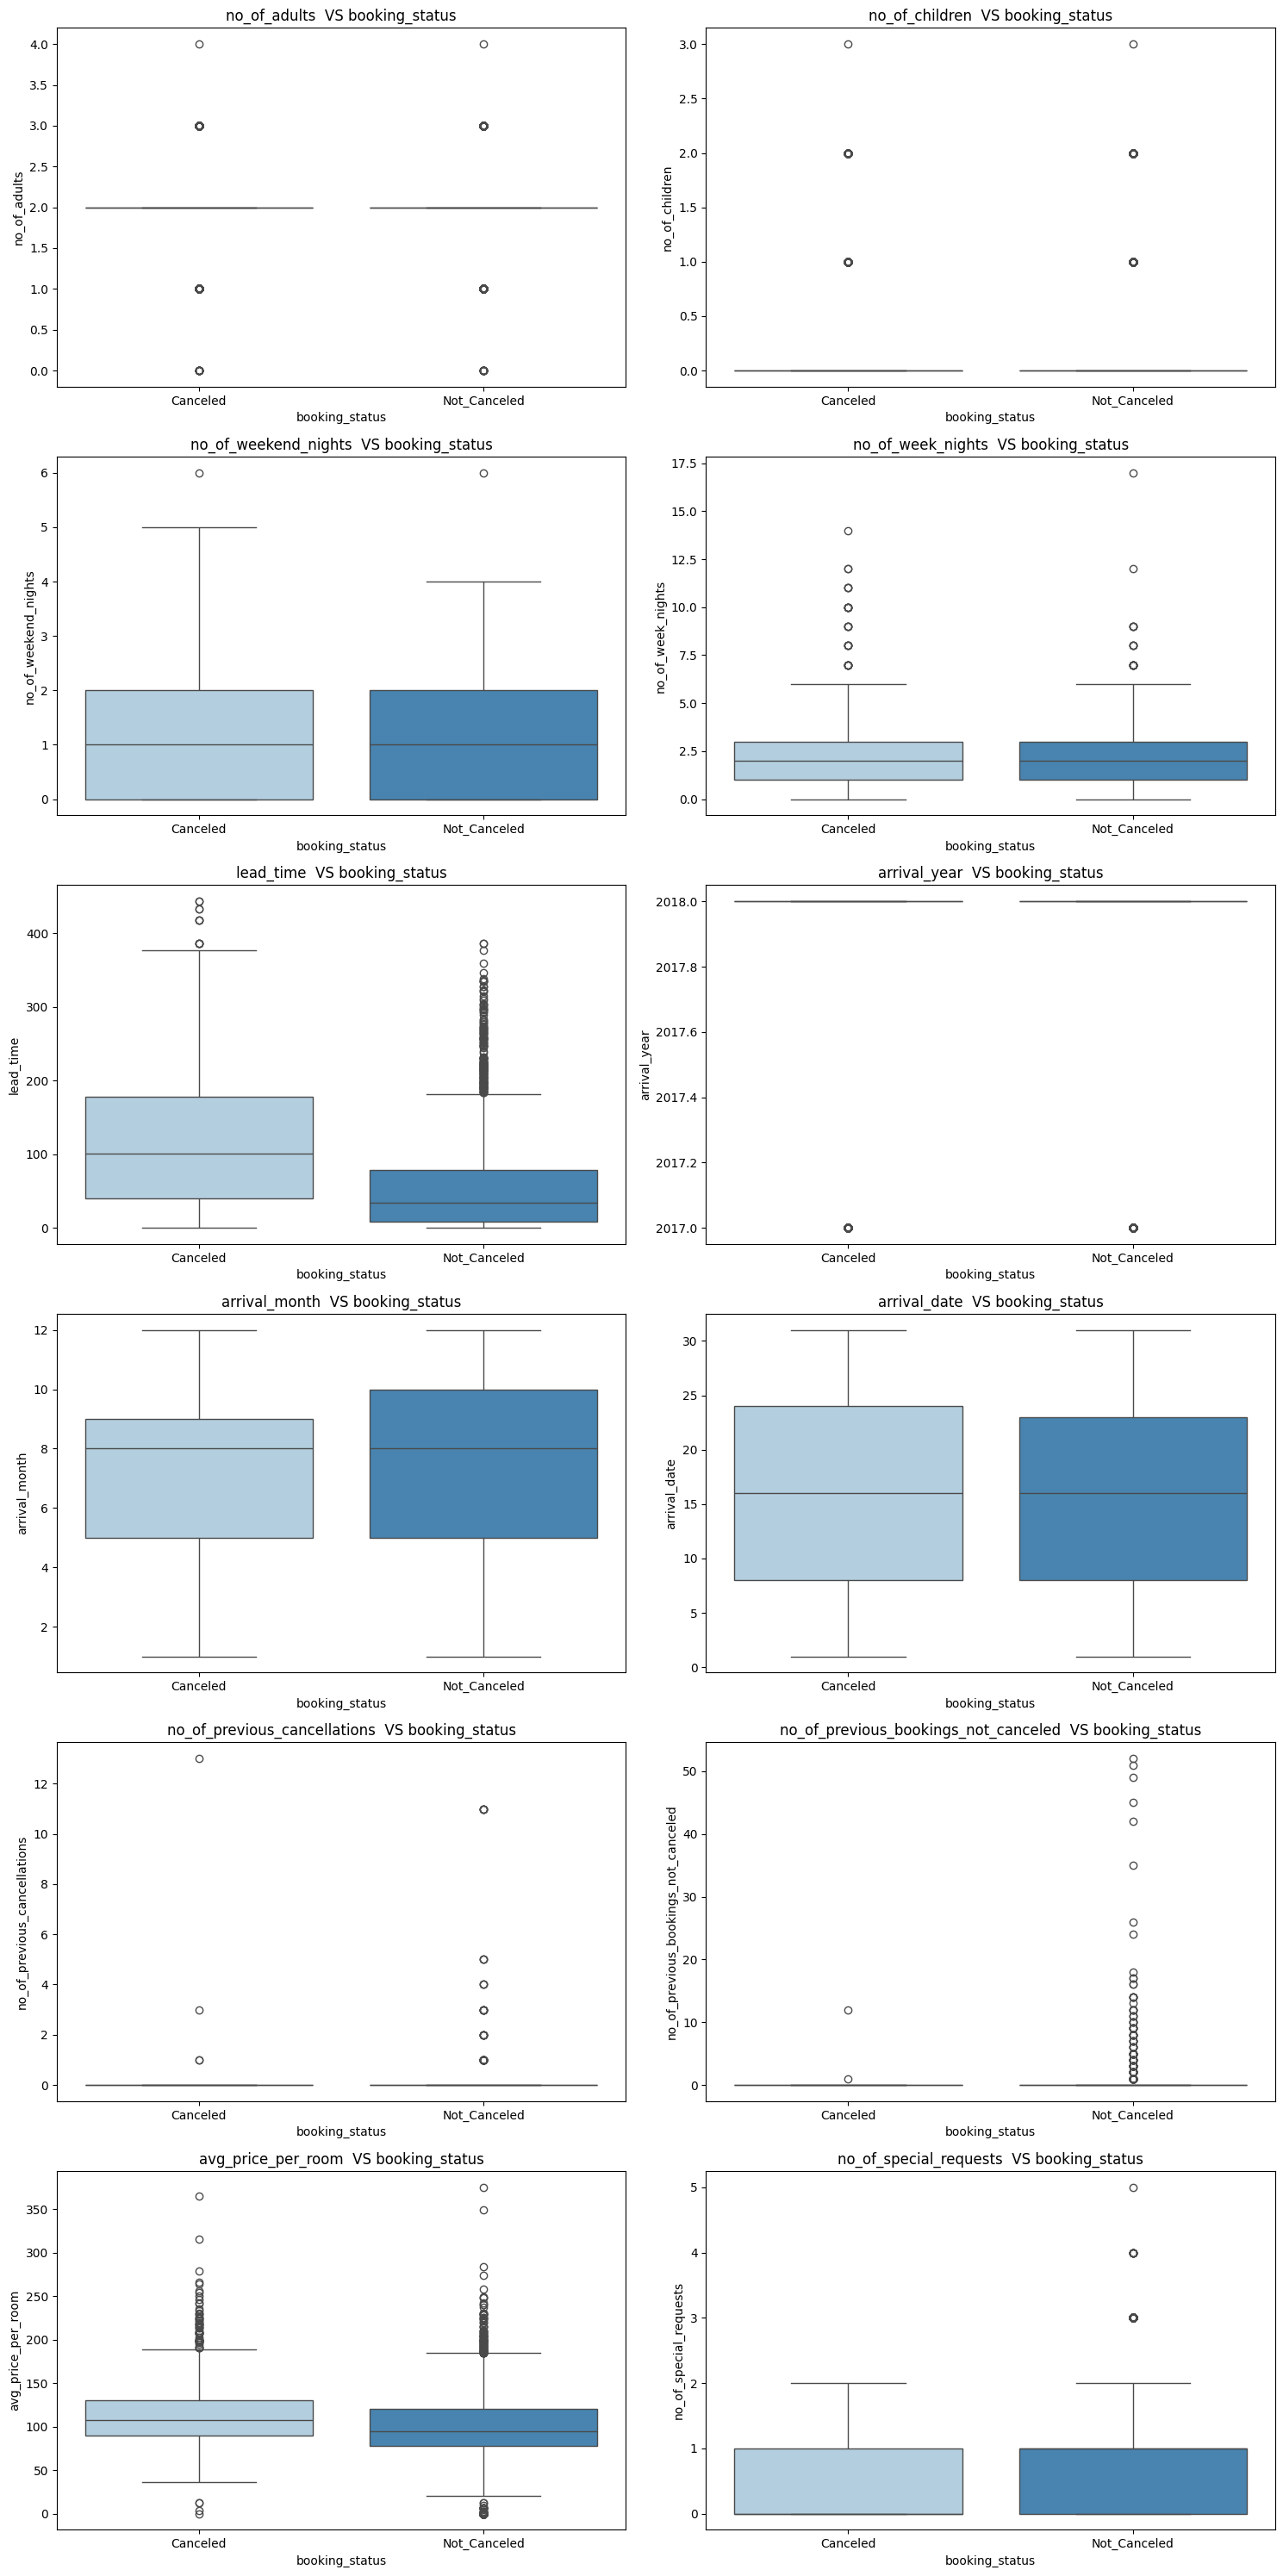

In [36]:
plot_bivariate_num(data , 'booking_status' , num_cols)

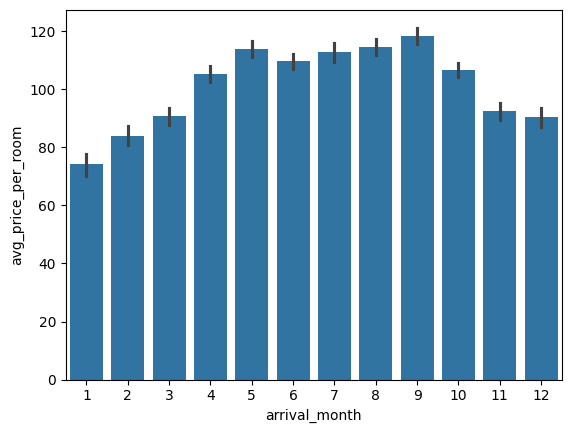

In [37]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [40]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

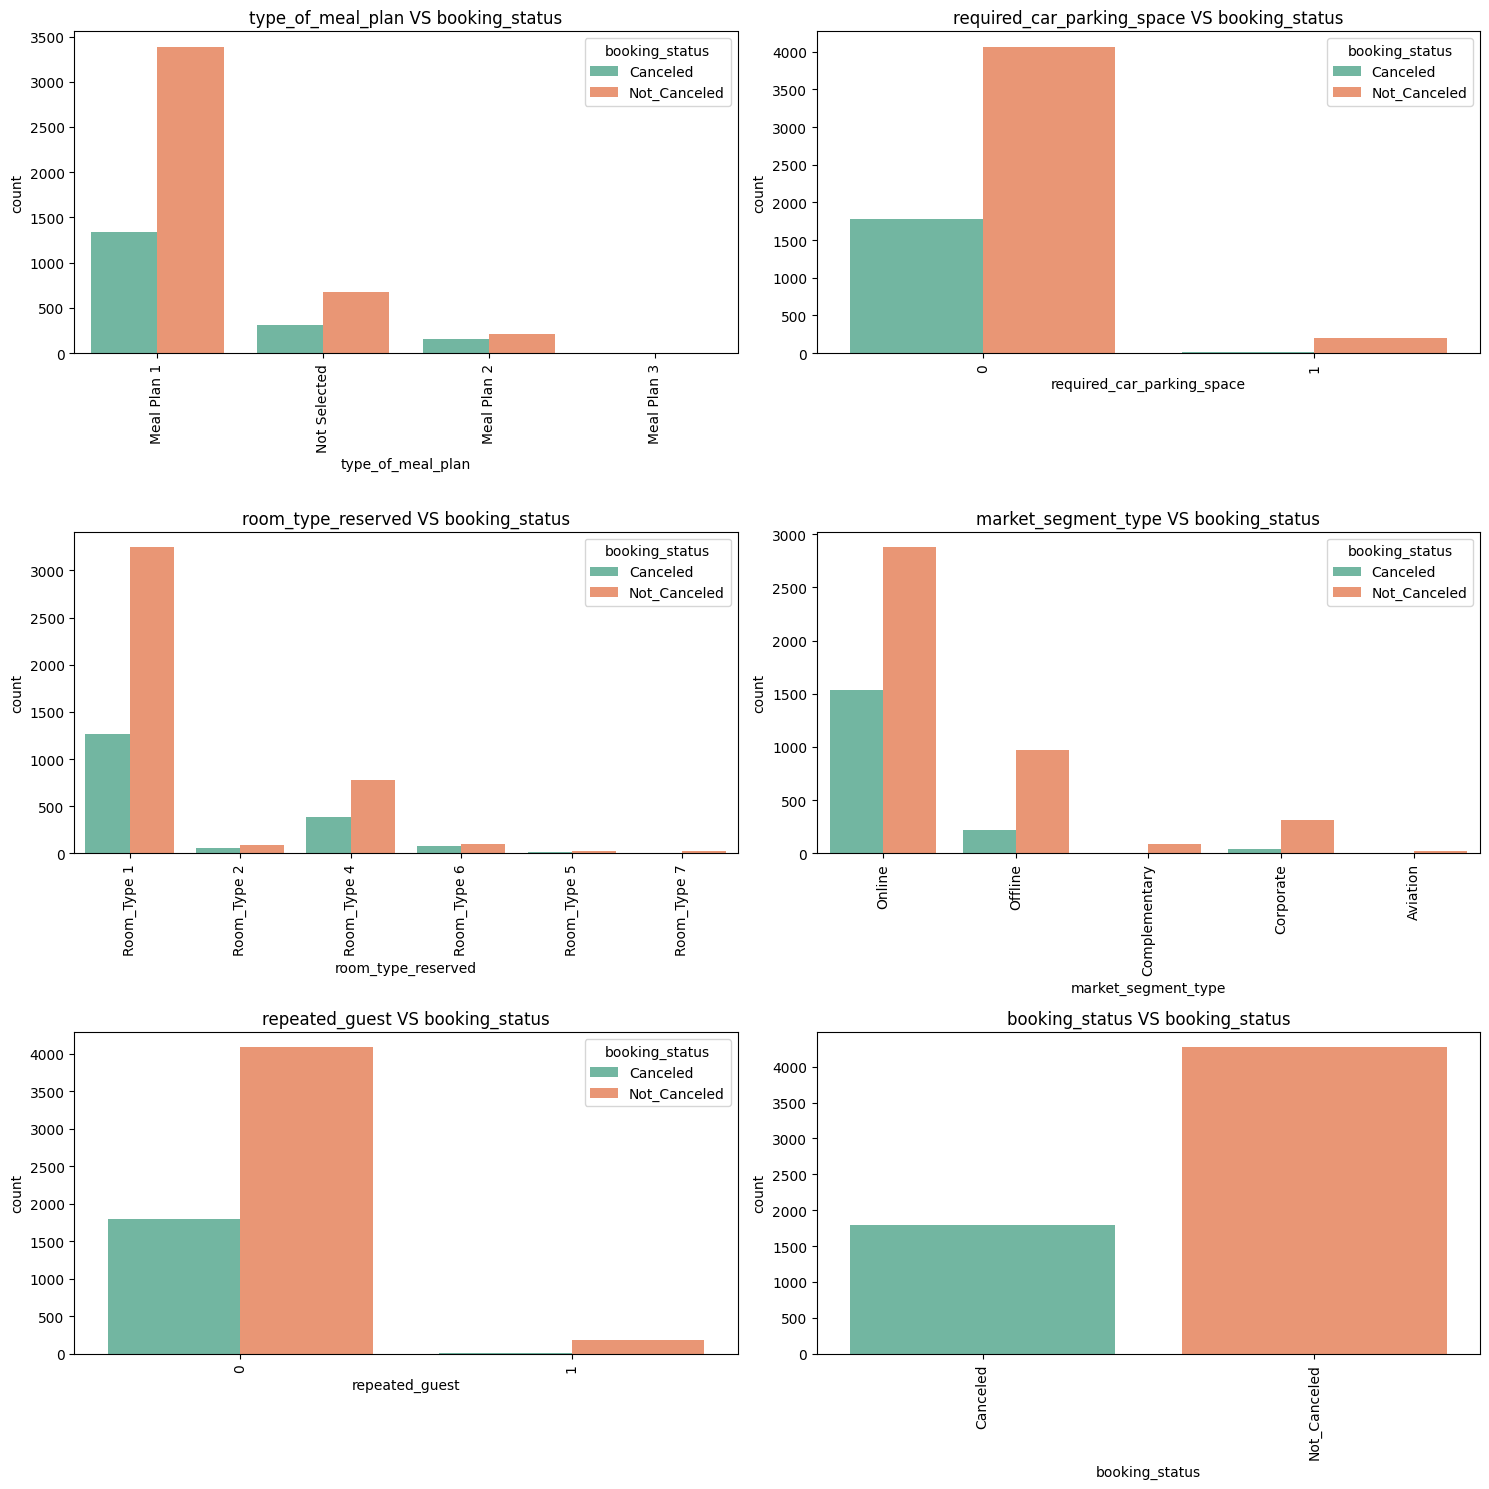

In [41]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

#### DATA PROCESSING

In [50]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,0,0,0,188,2018,8,26,4,0,0,0,90.95,0,0
1,1,0,1,4,3,0,0,20,2018,7,11,4,0,0,0,139.00,0,0
2,2,0,0,4,0,0,0,36,2017,10,21,4,0,0,0,96.30,2,1
3,2,0,0,1,3,0,0,77,2018,5,7,4,0,0,0,116.10,1,1
4,1,0,1,1,0,0,0,32,2018,7,18,3,0,0,0,85.00,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6069 entries, 0 to 7254
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          6069 non-null   int64  
 1   no_of_children                        6069 non-null   int64  
 2   no_of_weekend_nights                  6069 non-null   int64  
 3   no_of_week_nights                     6069 non-null   int64  
 4   type_of_meal_plan                     6069 non-null   int64  
 5   required_car_parking_space            6069 non-null   int64  
 6   room_type_reserved                    6069 non-null   int64  
 7   lead_time                             6069 non-null   int64  
 8   arrival_year                          6069 non-null   int64  
 9   arrival_month                         6069 non-null   int64  
 10  arrival_date                          6069 non-null   int64  
 11  market_segment_type   

In [44]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [52]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [56]:
df[cat_cols].head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,booking_status
0,0,0,0,4,0,0
1,3,0,0,4,0,0
2,0,0,0,4,0,1
3,3,0,0,4,0,1
4,0,0,0,3,0,1


In [53]:
mappings

{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4),
  np.int64(5): np.int64(5)},
 'market_segment_type': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3),
  np.int64(4): np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [57]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,0,0,0,188,2018,8,26,4,0,0,0,90.95,0,0
1,1,0,1,4,3,0,0,20,2018,7,11,4,0,0,0,139.00,0,0
2,2,0,0,4,0,0,0,36,2017,10,21,4,0,0,0,96.30,2,1
3,2,0,0,1,3,0,0,77,2018,5,7,4,0,0,0,116.10,1,1
4,1,0,1,1,0,0,0,32,2018,7,18,3,0,0,0,85.00,0,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6069 entries, 0 to 7254
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          6069 non-null   int64  
 1   no_of_children                        6069 non-null   int64  
 2   no_of_weekend_nights                  6069 non-null   int64  
 3   no_of_week_nights                     6069 non-null   int64  
 4   type_of_meal_plan                     6069 non-null   int64  
 5   required_car_parking_space            6069 non-null   int64  
 6   room_type_reserved                    6069 non-null   int64  
 7   lead_time                             6069 non-null   int64  
 8   arrival_year                          6069 non-null   int64  
 9   arrival_month                         6069 non-null   int64  
 10  arrival_date                          6069 non-null   int64  
 11  market_segment_type   

In [53]:
### Multicollinearity

In [49]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.6 MB 11.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -----

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [61]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [62]:
vif_data

,feature,VIF
0,const,4.007123e+07
1,no_of_adults,1.322210e+00
2,no_of_children,1.328586e+00
3,no_of_weekend_nights,1.057283e+00
4,no_of_week_nights,1.102437e+00
5,type_of_meal_plan,1.160898e+00
6,required_car_parking_space,1.036248e+00
7,room_type_reserved,1.545573e+00
8,lead_time,1.387805e+00
9,arrival_year,1.307155e+00


#### Our data dont have any multicollinearity

In [65]:
corr = df.corr()

In [66]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.053773,0.096573,0.112375,0.016225,0.018019,0.238002,0.120519,0.095426,-0.004847,0.009068,0.315552,-0.214712,-0.054412,-0.135248,0.311450,0.179751,-0.093863
no_of_children,-0.053773,1.000000,0.004723,0.032947,-0.095000,0.037885,0.394602,-0.003565,0.039092,-0.002349,0.037656,0.120841,-0.046042,-0.020227,-0.026175,0.356817,0.097520,-0.057117
no_of_weekend_nights,0.096573,0.004723,1.000000,0.178679,-0.046940,-0.047563,0.027981,0.101677,0.022438,-0.001089,0.007082,0.102943,-0.070412,-0.011698,-0.019969,-0.010118,0.018550,-0.051766
no_of_week_nights,0.112375,0.032947,0.178679,1.000000,-0.069889,-0.046110,0.092594,0.202384,0.037861,0.009877,0.005115,0.121250,-0.113817,-0.040445,-0.053915,0.030307,0.042002,-0.109776
type_of_meal_plan,0.016225,-0.095000,-0.046940,-0.069889,1.000000,-0.016568,-0.221909,-0.049489,0.094562,0.011051,0.001502,0.193195,-0.074383,-0.033823,-0.044228,-0.078887,0.000433,-0.034423
required_car_parking_space,0.018019,0.037885,-0.047563,-0.046110,-0.016568,1.000000,0.048871,-0.058160,0.008566,-0.027575,-0.001853,-0.004781,0.077976,-0.004654,0.015871,0.081088,0.098928,0.090765
room_type_reserved,0.238002,0.394602,0.027981,0.092594,-0.221909,0.048871,1.000000,-0.051121,0.092819,-0.000179,0.016628,0.089850,-0.016974,-0.009322,-0.011500,0.473655,0.094200,-0.062609
lead_time,0.120519,-0.003565,0.101677,0.202384,-0.049489,-0.058160,-0.051121,1.000000,0.148562,0.114528,0.010184,0.098958,-0.139616,-0.043054,-0.081506,-0.051830,-0.055163,-0.395504
arrival_year,0.095426,0.039092,0.022438,0.037861,0.094562,0.008566,0.092819,0.148562,1.000000,-0.340074,0.018153,0.133615,-0.009190,0.010935,0.025284,0.195089,0.016141,-0.154122
arrival_month,-0.004847,-0.002349,-0.001089,0.009877,0.011051,-0.027575,-0.000179,0.114528,-0.340074,1.000000,-0.041526,-0.011250,0.011758,-0.040245,-0.004834,0.065768,0.142892,0.020660


<Axes: >

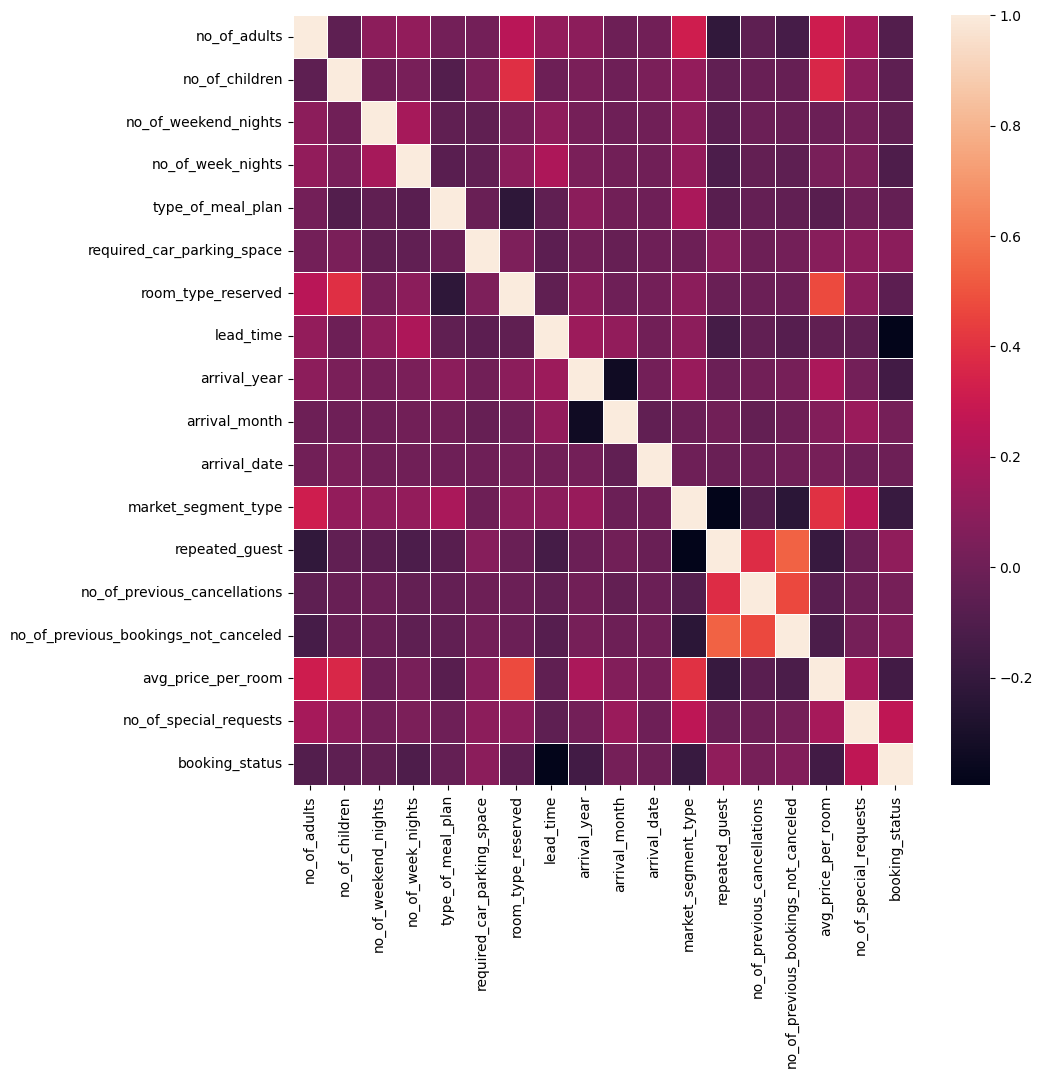

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [67]:
#### Skewness

In [77]:
skewness  = df.skew()

In [78]:
skewness

no_of_adults                            -0.411772
no_of_children                           3.508261
no_of_weekend_nights                     0.556734
no_of_week_nights                        1.324875
type_of_meal_plan                        1.684894
required_car_parking_space               4.976144
room_type_reserved                       1.805158
lead_time                                1.438499
arrival_year                            -1.879001
arrival_month                           -0.319874
arrival_date                            -0.014980
market_segment_type                     -2.145949
repeated_guest                           5.431475
no_of_previous_cancellations            13.541202
no_of_previous_bookings_not_canceled     7.912200
avg_price_per_room                       0.604273
no_of_special_requests                   0.959046
booking_status                          -0.891765
dtype: float64

In [79]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [75]:
#### Imablanced Data

In [80]:
df["booking_status"].value_counts()

booking_status
1    4270
0    1799
Name: count, dtype: int64

In [81]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [82]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [83]:
!pip install imbalanced-learn

In [75]:
y.value_counts()

booking_status
1    4270
0    1799
Name: count, dtype: int64

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [86]:
y_res

0       0
1       0
2       1
3       1
4       1
       ..
8535    0
8536    0
8537    0
8538    0
8539    0
Name: booking_status, Length: 8540, dtype: int64

In [87]:
y_res.value_counts()

booking_status
0    4270
1    4270
Name: count, dtype: int64

In [89]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [90]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,0,0,0,188,2018,8,26,4,0.0,0.0,0.0,90.95,0,0
1,1,0,1,4,3,0,0,20,2018,7,11,4,0.0,0.0,0.0,139.00,0,0
2,2,0,0,4,0,0,0,36,2017,10,21,4,0.0,0.0,0.0,96.30,2,1
3,2,0,0,1,3,0,0,77,2018,5,7,4,0.0,0.0,0.0,116.10,1,1
4,1,0,1,1,0,0,0,32,2018,7,18,3,0.0,0.0,0.0,85.00,0,1


In [91]:
balanced_df.shape

(8540, 18)

In [92]:
df = balanced_df.copy()

In [93]:
df.shape

(8540, 18)

In [92]:
#### Feature Selection

In [94]:
len(df.columns)

18

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [97]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
feature_importance = model.feature_importances_

In [139]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

ValueError: All arrays must be of the same length

In [142]:
feature_importance_df

,feature,importance
0,no_of_adults,0.020013
1,no_of_children,0.007870
2,no_of_weekend_nights,0.031252
3,no_of_week_nights,0.046786
4,type_of_meal_plan,0.022946
5,required_car_parking_space,0.009058
6,room_type_reserved,0.019475
7,lead_time,0.271169
8,arrival_year,0.016111
9,arrival_month,0.092896


In [100]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [140]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [141]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,no_of_adults,booking_status
0,188,0,90.95,8,26,4,3,2,0,2,0
1,20,0,139.00,7,11,4,4,1,3,1,0
2,36,2,96.30,10,21,4,4,0,0,2,1
3,77,1,116.10,5,7,4,1,0,3,2,1
4,32,0,85.00,7,18,3,1,1,0,1,1


In [103]:
len(top_10_df.columns)

11

In [104]:
df = top_10_df.copy()

### MODEL SELECTION

In [105]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 9.6 MB/s eta 0:00:08
   -- ------------------------------------- 3.7/72.0 MB 10.9 MB/s eta 0:00:07
   --- ------------------------------------ 6.0/72.0 MB 11.2 MB/s eta 0:00:06
   ---- ----------------------------------- 8.4/72.0 MB 11.6 MB/s eta 0:00:06
   ----- ---------------------------------- 9.7/72.0 MB 11.4 MB/s eta 0:00:06
   ------- -------------------------------- 12.8/72.0 MB 10.9 MB/s eta 0:00:06
   -------- ------------------------------- 15.2/72.0 MB 11.0 MB/s eta 0:00:06
   --------- ------------------------------ 17.6/72.0 MB 11.1 MB/s eta 0:00:05
   ----------- ---------------------------- 20.2/72.0 MB 11.2 MB/s eta 0:00:05
   ------------ --------------------------- 22.5/72.0 MB 11.1 MB/s eta 0:00:05
   -------------- ------------------------- 25.4/72.0 MB 11.3 MB/s eta 0:00:05
   --------------- ------------------------ 27.8/72.0 MB 11.4 MB/s 

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [107]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [108]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [109]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [110]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [111]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 3431, number of negative: 3401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 6832, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502196 -> initscore=0.008782
[LightGBM] [Info] Start training from score 0.008782


In [112]:
metrics_df= pd.DataFrame(metrics)

In [113]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.891686,0.887441,0.892729,0.890077
1,LogisticRegression,0.796253,0.808805,0.766389,0.787026
2,Gradient Boosting,0.849532,0.838372,0.859356,0.848735
3,Suuport vector classifier,0.705504,0.682213,0.749702,0.714367
4,Decsion Tree,0.837822,0.844363,0.821216,0.832628
5,KNN,0.776347,0.826896,0.688915,0.751625
6,Naive Bayes,0.800351,0.807407,0.779499,0.793208
7,XGboost,0.894028,0.894484,0.889154,0.891811
8,Adaboost,0.831967,0.835766,0.818832,0.827213
9,LGBM,0.882319,0.870930,0.892729,0.881695


In [120]:
##### TRAIN OUR RF MODEL

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [116]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [117]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [118]:
rf = RandomForestClassifier(random_state=42)

In [119]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [120]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [121]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   1.6s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....00250FB214BD0>, 'min_samples_leaf': <scipy.stats....00250FB337DD0>, 'min_samples_split': <scipy.stats....00250FB215750>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [122]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [123]:
best_rf_model = random_search.best_estimator_

In [124]:
y_pred = best_rf_model.predict(X_test)

In [125]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [126]:
accuracy

0.8905152224824356

In [127]:
precision

0.8790697674418605

In [128]:
recall

0.901072705601907

In [129]:
f1

0.8899352560329605

In [136]:
### Save this model

In [130]:
import joblib

In [131]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [132]:
loaded_model=joblib.load("random_forest.pkl")

In [133]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,no_of_adults
8534,159,0,114.749898,5,12,4,1,2,0,2


In [134]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [137]:
predictions=loaded_model.predict(new_data)

In [138]:
predictions

array([0])